# Name: Youssaf Menacer

# Dataset: 'Dogs of Zurich: data about the dog owners of Zurich Switzerland'

# 1- Introduction:

The Zurich dogs dataset contains information about dogs registered in the city of Zurich.
The aim of this analysis is to explore and gain insights from the dataset to understand various aspects of dog ownership in Zurich.

# 2- Data Exploration:

In [1]:
# Loading libraries and importing dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# reading the file
data = pd.read_csv('20170308hundehalter.csv')

In [2]:
# Check the first five rows
data.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


# Remark 01:

-> We observe that the name of the columns is in German language as the dataset is taken from Zurich where German language is the official luguage there.

-> Let us change the columns names to English.

In [3]:
data.columns=['DOG_ID', 'AGE', 'GENDER', 'CITY_DISTRICT', 'CITY_NEIGHBORHOOD',
'BREED1', 'BREED1_MIXED', 'BREED2', 'BREED2_MIXED', 'BREED_TYPE',
'DOG_BIRTH_YEAR', 'DOG_GENDER', 'DOG_COLOR']

In [4]:
data.head()

,DOG_ID,AGE,GENDER,CITY_DISTRICT,CITY_NEIGHBORHOOD,BREED1,BREED1_MIXED,BREED2,BREED2_MIXED,BREED_TYPE,DOG_BIRTH_YEAR,DOG_GENDER,DOG_COLOR
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [5]:
# Let check information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DOG_ID             7155 non-null   int64  
 1   AGE                7154 non-null   object 
 2   GENDER             7155 non-null   object 
 3   CITY_DISTRICT      7154 non-null   float64
 4   CITY_NEIGHBORHOOD  7154 non-null   float64
 5   BREED1             7155 non-null   object 
 6   BREED1_MIXED       618 non-null    object 
 7   BREED2             543 non-null    object 
 8   BREED2_MIXED       0 non-null      float64
 9   BREED_TYPE         7155 non-null   object 
 10  DOG_BIRTH_YEAR     7155 non-null   int64  
 11  DOG_GENDER         7155 non-null   object 
 12  DOG_COLOR          7155 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 726.8+ KB


In [6]:
# Let us Check Missing Data
missing_count = data.isna().sum()
missing_count

DOG_ID                  0
AGE                     1
GENDER                  0
CITY_DISTRICT           1
CITY_NEIGHBORHOOD       1
BREED1                  0
BREED1_MIXED         6537
BREED2               6612
BREED2_MIXED         7155
BREED_TYPE              0
DOG_BIRTH_YEAR          0
DOG_GENDER              0
DOG_COLOR               0
dtype: int64

# Remark 02:

We drop missing the missing columns as they do not affect our study  

In [7]:
data = data.drop(['BREED1_MIXED', 'BREED2', 'BREED2_MIXED'], axis=1)

In [8]:
# Checking
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DOG_ID             7155 non-null   int64  
 1   AGE                7154 non-null   object 
 2   GENDER             7155 non-null   object 
 3   CITY_DISTRICT      7154 non-null   float64
 4   CITY_NEIGHBORHOOD  7154 non-null   float64
 5   BREED1             7155 non-null   object 
 6   BREED_TYPE         7155 non-null   object 
 7   DOG_BIRTH_YEAR     7155 non-null   int64  
 8   DOG_GENDER         7155 non-null   object 
 9   DOG_COLOR          7155 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 559.1+ KB


In [9]:
# Let us handle the missing data in the other features
# Fill numerical missing values with mean
numerical_features = ['DOG_BIRTH_YEAR']
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

# Fill categorical missing values with median
categorical_features = ['CITY_DISTRICT', 'CITY_NEIGHBORHOOD']
data[categorical_features] = data[categorical_features].fillna(data[categorical_features].median())
data = data.dropna(subset=['AGE'])

In [10]:
# Checking
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7154 entries, 0 to 7154
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DOG_ID             7154 non-null   int64  
 1   AGE                7154 non-null   object 
 2   GENDER             7154 non-null   object 
 3   CITY_DISTRICT      7154 non-null   float64
 4   CITY_NEIGHBORHOOD  7154 non-null   float64
 5   BREED1             7154 non-null   object 
 6   BREED_TYPE         7154 non-null   object 
 7   DOG_BIRTH_YEAR     7154 non-null   int64  
 8   DOG_GENDER         7154 non-null   object 
 9   DOG_COLOR          7154 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 614.8+ KB


# Interesting statistics or observations

a- Distribution of dog ages:

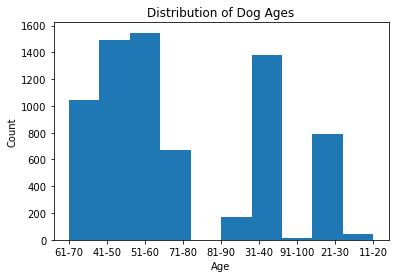

In [11]:
 # Plotting histogram of dog ages
plt.hist(data['AGE'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Dog Ages')
plt.show()

# Remark 04:

We observe that it is difficult to read this histogram. Let us reorder the y-axis values in increasing order using SEABORN library.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='count'>

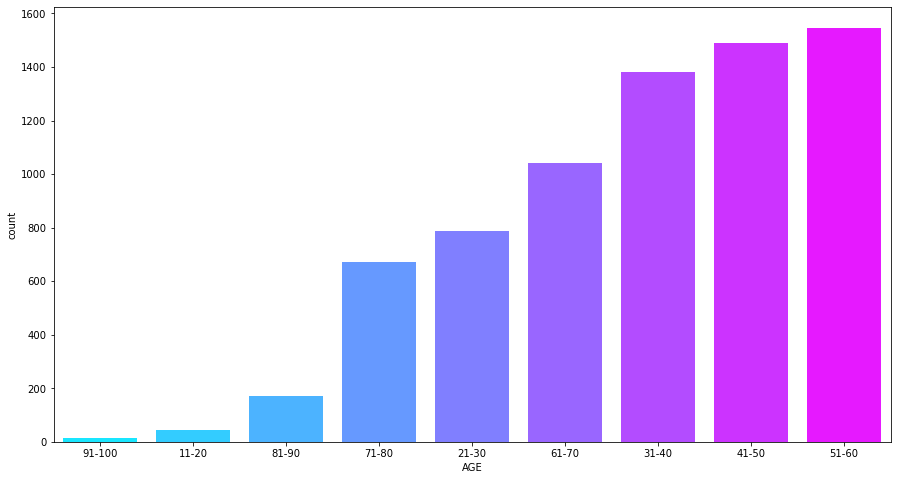

In [19]:
order = data.AGE.value_counts()  # Counting how many of each type there are.
order = order.sort_values()  # Ordering types ascendingly.

plt.figure(figsize=(15 , 8))
sns.countplot(data.AGE, saturation=1, palette="cool", order=order.index)

In [26]:
# Gender ratio of registered dogs:
# Replace 'w' with 'f' in the 'GENDER' column for proper notation
data['GENDER'] = data['GENDER'].replace('w', 'f')

b-Gender ratio of registered dogs:

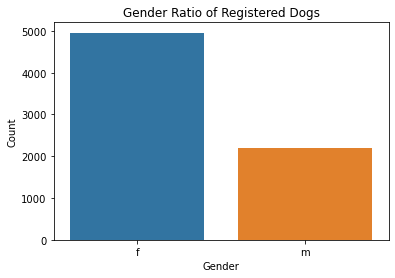

In [27]:
# Counting the number of each gender
gender_counts = data['GENDER'].value_counts()

# Plotting gender ratio as a bar chart
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Ratio of Registered Dogs')
plt.show()

In [28]:
# Count the occurrences of each gender
gender_counts = data['GENDER'].value_counts()

# Calculate the percentage for each gender
total_count = gender_counts.sum()
percentage_f = (gender_counts['f'] / total_count) * 100
percentage_m = (gender_counts['m'] / total_count) * 100

# Print the percentages
print("Percentage of Females: {:.2f}%".format(percentage_f))
print("Percentage of Males: {:.2f}%".format(percentage_m))

Percentage of Females: 69.30%
Percentage of Males: 30.70%


c- The geographical distribution across different city districts:

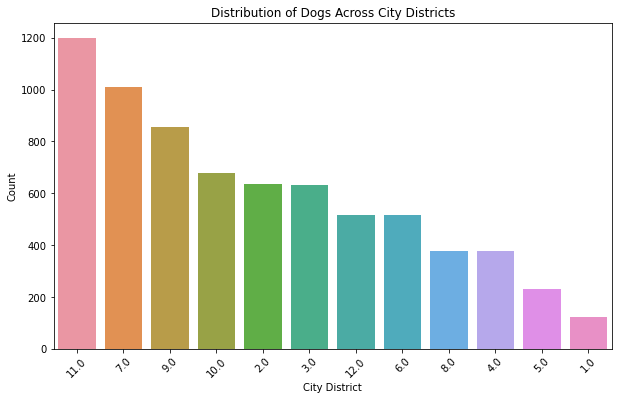

In [29]:
# Count the occurrences of each district
district_counts = data['CITY_DISTRICT'].value_counts()

# Plotting the distribution of dogs across districts
plt.figure(figsize=(10, 6))
sns.countplot(x='CITY_DISTRICT', data=data, order=district_counts.index)
plt.xlabel('City District')
plt.ylabel('Count')
plt.title('Distribution of Dogs Across City Districts')
plt.xticks(rotation=45)
plt.show()

# 3- Questions:

Question 1: "What is the overall distribution of dog ages in the dataset?"

Question 2: "How does the gender of dogs vary across different city districts?"

Question 3: "Are there any noticeable trends in the popularity of dog breeds?"

# 4- Trends Investigated: 

For question 01, according to the histogram for "AGE" we explored aboved, we end up with this remark,

We observe that dogs in the age of [51-60], [41-50],[31-40] are the most popular in this city followed by the other ages intervals. However, older dogs in the age of [81-90] and [91-100] represent the minority in this city as well as puppies in the age of [11-20]. 

Now, for question 02, we use pandas crosstab to answer it. 

<Figure size 720x432 with 0 Axes>

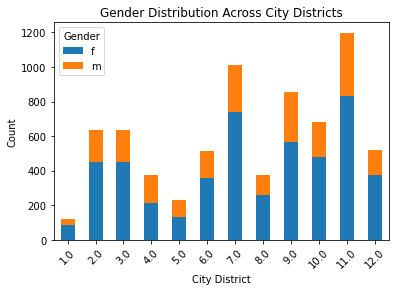

In [32]:
# Create a cross-tabulation of gender and city district
gender_district_table = pd.crosstab(data['CITY_DISTRICT'], data['GENDER'])

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
gender_district_table.plot(kind='bar', stacked=True)
plt.xlabel('City District')
plt.ylabel('Count')
plt.title('Gender Distribution Across City Districts')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Finally, for question 03, 

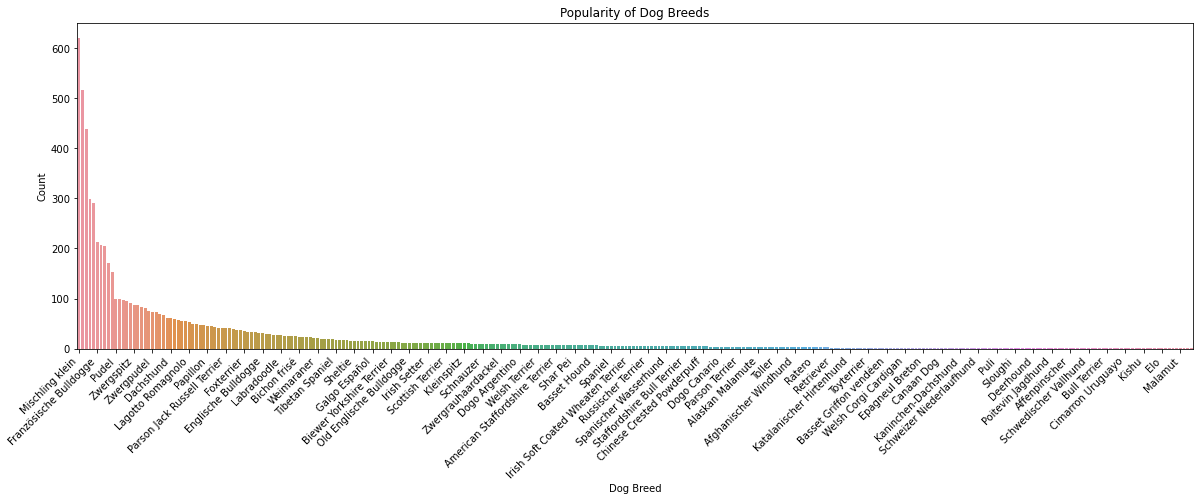

In [38]:
# Count the occurrences of each dog breed
breed_counts = data['BREED1'].value_counts()

# Plotting the popularity of dog breeds
plt.figure(figsize=(20, 6))
sns.barplot(x=breed_counts.index, y=breed_counts.values)
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.title('Popularity of Dog Breeds')
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
plt.xticks(range(0, len(breed_counts), 5))  # Display every 5th label
plt.show()

# 5- Conclusions:

Conclusions: 

From these visualizations, we can conclude that dog ownership in Zurich is diverse in terms of age, gender, and breed preferences. The district "11" has a higher concentration of male and female dogs. Moreover, "Mischling Klein" dogs are quite popular among the registered dogs.